Elements pris dans http://www.neural.cz/dataset-exploration-boston-house-pricing.html, dans la documentation de seaborn (http://seaborn.pydata.org/api.html), et dans la documentation de scikit-learn (https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-model-from-regression-to-sparsity)

# Explorer des données

## importer les modules nécessaires

In [2]:
import numpy as np # numpy est la librairie python pour le calcul numérique
import pandas as pd  # pandas pour manipuler des dataframes (tables avec entêtes)
import matplotlib.pyplot as plt  # matplotlib pour trace rdes graphiques
import seaborn as sns  # seaborn est une extension de matplotlib pour une utilisation plus facile 

In [3]:
# afficher les graphiques dans le notebook (sinon on ouvre de nouvelles fenêtres)
%matplotlib inline  
sns.set()  # prendre les bons réglages par défaut dans seaborn

In [4]:
from sklearn import datasets  # charger le module de sklearn contenant divers jeux de données
boston = datasets.load_boston()  # l'un d'eux est boston.

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Question** Quelles sont ces fameuses données ? Essayez d'appuyer sur la touche de tabulation (au dessus du verrouillage majuscule) après `boston.`, donc de faire

> boston.&lt;TAB&gt;

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

**Question** Une autre façon est d'utiliser la fonction python `dir` sur le nom `boston`.

In [7]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

**Questions** `boston.data` contient les données dans une matrice et les dimensions de la matrice sont dans `boston.data.shape`
- Observez `boston.data`
- Observez `boston.data.shape`


In [8]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
boston.data.shape

(506, 13)

**Question** Afficher les autres attributs de l'objet boston. (Ceux dont vous pouvez voir les noms avec la touche TAB)

In [10]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
boston.filename

'/opt/anaconda/lib/python3.8/site-packages/sklearn/datasets/data/boston_house_prices.csv'

On peut voir que le type des données chargées dans boston.data est un `ndarray` de `numpy`.

In [13]:
type(boston.data)

numpy.ndarray

## Charger les données dans pandas

Même si les données en mémoire sont dans un format qui permet de faire ce qu'on veut, les enregistrer dans des `dataframe`s de Pandas facilite les manipulations. Pandas permet par exemple d'avoir des statistiques descriptives et de manipuler les données plus facilement.

In [14]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)  # créer un dataframe
df['target'] = boston.target  # ajouter une colonne avec la cible.

In [15]:
df.head()  # affiche les premières lignes du dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Question** L'attribut `df.shape` montre aussi les dimensions du `dataframe`. Affichez ces dimensions

In [16]:
df.shape

(506, 14)

Avec ces `dataframe` il est plus facile d'observer des colonnes, des lignes, des parties des données...

In [17]:
df['ZN']

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64

In [18]:
df[['CRIM', 'ZN', 'TAX']]

,CRIM,ZN,TAX
0,0.00632,18.0,296.0
1,0.02731,0.0,242.0
2,0.02729,0.0,242.0
3,0.03237,0.0,222.0
4,0.06905,0.0,222.0
...,...,...,...
501,0.06263,0.0,273.0
502,0.04527,0.0,273.0
503,0.06076,0.0,273.0
504,0.10959,0.0,273.0


**Question** Afficher maintenant uniquement les colonnes `AGE` et `PTRATIO`

In [19]:
df[['AGE', 'PTRATIO']]

,AGE,PTRATIO
0,65.2,15.3
1,78.9,17.8
2,61.1,17.8
3,45.8,18.7
4,54.2,18.7
...,...,...
501,69.1,21.0
502,76.7,21.0
503,91.0,21.0
504,89.3,21.0


Une autre façon est d'utiliser des indices sous forme de nombre entier avec `icol`

In [20]:
df.iloc[0:3,0:2]

,CRIM,ZN
0,0.00632,18.0
1,0.02731,0.0
2,0.02729,0.0


**Question** Afficher les lignes de 5 à 8 pour les attributs numérotés de 4 à 8

In [21]:
df.iloc[4:9,4:8]

,NOX,RM,AGE,DIS
4,0.458,7.147,54.2,6.0622
5,0.458,6.430,58.7,6.0622
6,0.524,6.012,66.6,5.5605
7,0.524,6.172,96.1,5.9505
8,0.524,5.631,100.0,6.0821


## Valeurs manquantes ? 

Dans certains cas, il y a des valeurs manquantes représentées par NaN. Pour illustrer cela, créons un `dataframe` avec quelques données dont une manquante.

In [22]:
tmpdf = pd.DataFrame([[np.NaN, 1, 2],[1, 3, 2]], columns=['A', 'B', 'C'])
tmpdf

,A,B,C
0,NaN,1,2
1,1.0,3,2


In [23]:
tmpdf.describe()   # la méthode describe affiche des statistiques descriptives

,A,B,C
count,1.0,2.000000,2.0
mean,1.0,2.000000,2.0
std,NaN,1.414214,0.0
min,1.0,1.000000,2.0
25%,1.0,1.500000,2.0
50%,1.0,2.000000,2.0
75%,1.0,2.500000,2.0
max,1.0,3.000000,2.0


La fonction `isnull` de pandas construit une matrice avec des valeurs `True` (1) et `False` (0) si les valeurs dans la matrice du `dataframe` en argument sont nulles ou pas. La méthode `sum` fait une somme (par défaut en colonne).

In [24]:
pd.isnull(tmpdf).sum()

A    1
B    0
C    0
dtype: int64

**Question** Vérifier qu'il n'y en n'a pas dans `boston`.

In [25]:
pd.isnull(boston.data).sum()

0

##  Statistiques descriptives

Il est important de regarder ce que contiennent les données, se donner une idée,...

In [26]:
df.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
target      22.532806
dtype: float64

In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
correlations = df.corr(method='pearson')  # matrice de correlation

In [29]:
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Correlations avec la cible! 
Indicer avec -1 retrouve le dernier élément. Ici la dernière ligne et toutes les colonnes sauf la dernière.

In [30]:
correlations.iloc[-1,:-1].abs().sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
Name: target, dtype: float64

## Visualisations

`Seaborn` est une extension de `matplotlib` qui permet de faciliter les visualisations. 

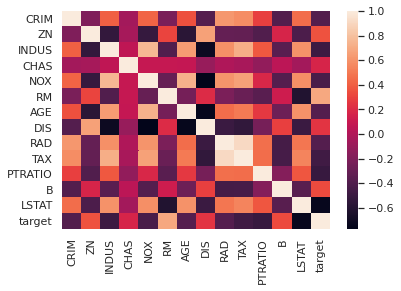

In [31]:
sns.heatmap(correlations)

Les couleurs ne sont pas jolies. Créons une palette de couleurs (une colormap ou cmap)

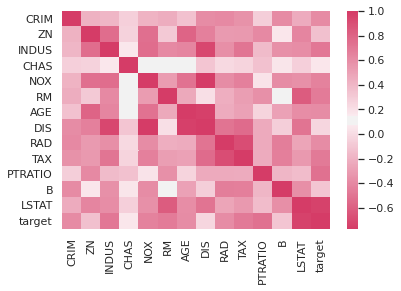

In [32]:
palette = sns.diverging_palette(1, 1, as_cmap=True)
sns.heatmap(correlations, cmap=palette)

### Par attribut

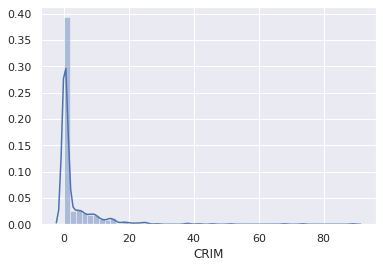

In [33]:
sns.distplot(df['CRIM'])

**Question** Afficher la distribution sous forme d'histogramme pour un autre attibut. 

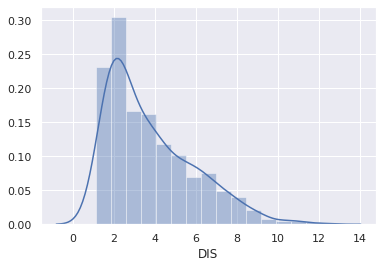

In [34]:
sns.distplot(df['DIS'])

Dans `matplotlib` la fonction `scatter` trace un ensemble de points selon deux axes.

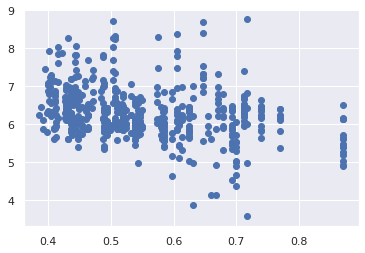

In [35]:
plt.scatter(df['NOX'], df['RM'])

Dans `seaborn` la fonction `scatter` donne aussi les histogrammes. D'autres fonctions comme `jointplot` affichent les distributions selon d'autres méthodes.

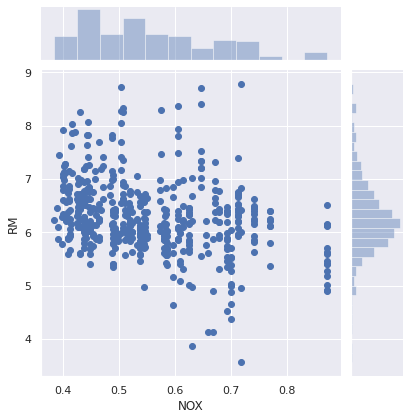

In [36]:
sns.jointplot(df['NOX'], df['RM'], kind='scatter')

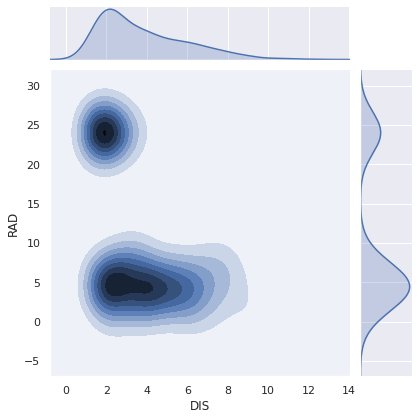

In [37]:
sns.jointplot(df['DIS'], df['RAD'], kind='kde')

**Question** Regarder la documentation de `seaborn` et faire des essais sur les autres couples d'attributs.

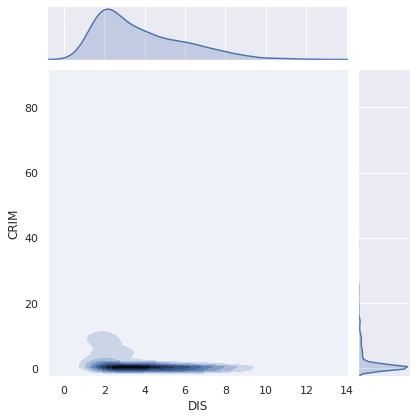

In [38]:
sns.jointplot(df['DIS'], df['CRIM'], kind='kde')

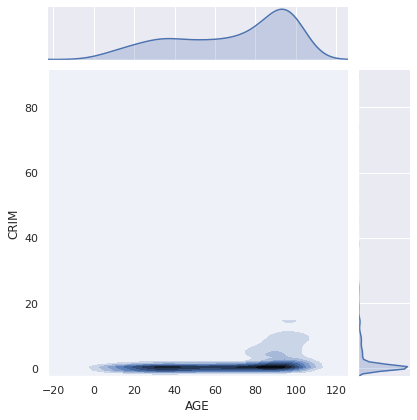

In [39]:
sns.jointplot(df['AGE'], df['CRIM'], kind='kde')

**Question** Créer un dataframe restreint aux attributs 'AGE', 'DIS', 'RAD', 'TAX'. Représenter des graphiques en grille montrant les relations entre paires de distributions de ces attributs 

In [40]:
df2 = df[['AGE', 'DIS', 'RAD', 'TAX']]

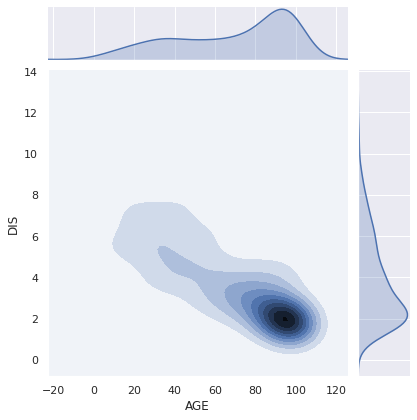

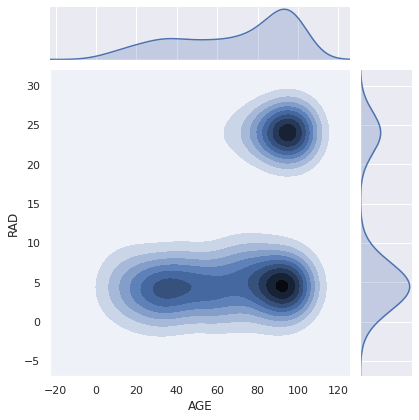

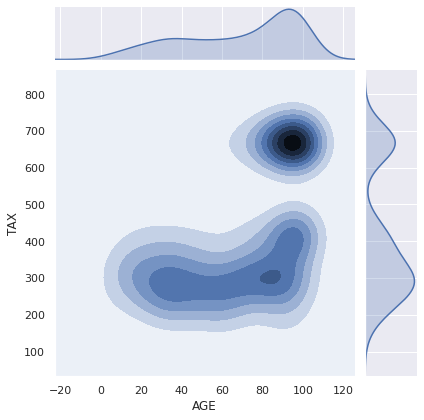

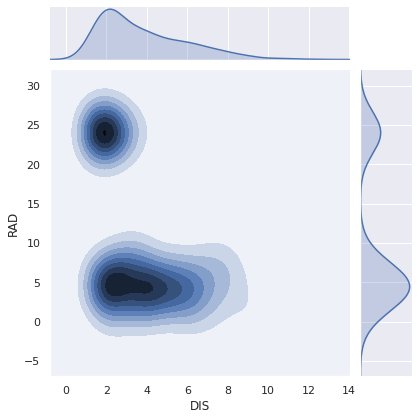

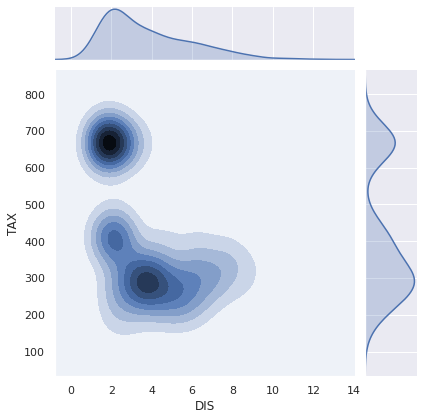

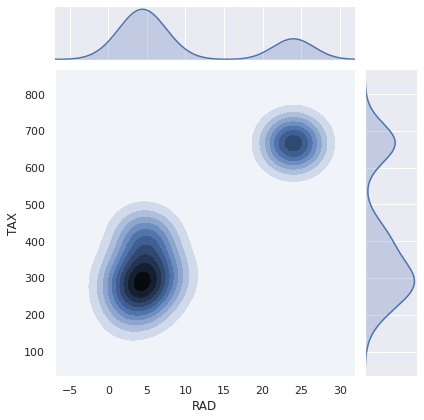

In [41]:
sns.jointplot(df2['AGE'], df2['DIS'], kind='kde')
sns.jointplot(df2['AGE'], df2['RAD'], kind='kde')
sns.jointplot(df2['AGE'], df2['TAX'], kind='kde')
sns.jointplot(df2['DIS'], df2['RAD'], kind='kde')
sns.jointplot(df2['DIS'], df2['TAX'], kind='kde')
sns.jointplot(df2['RAD'], df2['TAX'], kind='kde')

# Vers de la prédiction

On va maintenant s'intéresser à estimer des valeurs futures sur la base des données que nous possédons. Par exemple ici, prédire les valeurs de la cible. Il nous faut un modèle de prédiction. La variable à prédire est continue. Nous avons un problème de régression. Nous choisissons un simple modèle de régression linéaire. 

## Apprendre un modèle linéaire

**Question** Regardez la documentation de sklearn à propos des [modèles linéaires](https://scikit-learn.org/stable/modules/linear_model.html). Importez `linear_model`.

In [42]:
from sklearn import linear_model

**Question** Construire un objet `lr` qui pourra apprendre un modèle de régression linéaire à partir de données.

In [43]:
lr = linear_model.LinearRegression()

On s'intéresse à de la **prédiction**. Donc il est important de savoir comment se comportera le modèle quand il recevra de **nouvelles données**. Nous n'avons qu'un échantillon. Nous allons donc simuler l'apparition de nouvelles données en découpant l'échantillon en deux parties : 

- une partie qui sert à apprendre le modèle, l'ensemble d'apprentissage (train)
- une partie qui sert à estimer l'erreur sur de nouvelles données, l'ensemble test (test)

Sklearn fournit des fonctions pour aléatoirement découper un échantillon en ces deux parties : [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

**Question** : importer cette fonction `train_test_split`.

In [44]:
from sklearn.model_selection import train_test_split

Le découpage est aléatoire, pour la reproductibilité on utilise un graine fixée pour le générateur de nombres aléatoires (c'est `random_state`). 

**Question** Utiliser `train_test_split` sur `boston.data` et `boston.test` en découpant en 1/3 pour le test et 2/3 pour l'entraînement. Construisez donc quatre objets que vous appelez `X_train`, `X_test`, `y_train`, `y_test`.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.33, random_state=42)

**Question**. Maintenant, entraînez le modèle linéaire avec l'ensemble d'entraînement. Regardez à nouveau la documentation des [modèles linéaires](https://scikit-learn.org/stable/modules/linear_model.html) pour savoir comment faire.

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

La solution sera une équation linéaire de la forme $y = w_0+\sum_{i=1}^p w_ix_i$. 

**Question**  Quelle est la valeur de $p$ dans cet exemple ? 

In [ ]:
p: nombre de points (507) 

**Question** Affichez les valeurs des coefficients calculés par le modèle pour $w_0$ et pour les $w_i$.  

In [47]:
lr.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

On peut maintenant utiliser ce modèle pour prédire une valeur. 

**Question** Quelle est la valeur prédite pour le vecteur nul (tous les $x_i=0$) 

In [48]:
lr.intercept_

33.33497575563571

**Question** Calculer un vecteur `predictions_train` de toutes les prédictions pour chaque donnée dans l'ensemble `X_train`. Afficher le premier élément de ce vecteur ainsi que la vraie valeur.

In [49]:
predictions_train = lr.predict(X_train)

In [49]:
predictions_train[0]

18.949933532727215

In [54]:
y_train[0]

14.6

Sklearn fournit des fonctions pour estimer l'erreur sur cet ensemble train, puis sur l'ensemble de test. Il s'agit de la méthode `score` de l'objet `lr` construit.

**Question** Calculer l'erreur sur l'échantillon d'entraînement et sur l'échantillon de test.

In [51]:
lr.score(X_train, y_train)

0.7392344370995025

In [52]:
lr.score(X_test, y_test)

0.7261570836552478

**Question** Mémoriser dans `predictions_test` le vecteur de prédictions sur l'échantillon test. 

In [53]:
predictions_test = lr.predict(X_test)

La valeur calculée par la méthode `score` est expliquée dans la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression). 

**Question** Reproduire ce calcul comme expliqué dans la documentation et vérifier que c'est bien le résultat calculé par `score`.

In [55]:
u = ((y_test - predictions_test)**2).sum()

In [56]:
v = np.power(np.subtract(y_test, y_test.mean()),2).sum()

In [57]:
print(1 - u/v)

0.7261570836552478


On peut tracer un graphique montrant de combien les valeurs prédites s'écartent des valeurs réelles. Pour cela, on va faire un diagramme avec les valeurs prédites en $y$ et les valeurs réelles en $x$. On utilise `scatter` de `matplotlib.pyplot` (ici appelé `plt`).

**Question** Utiliser `plt.scatter` pour tracer ce diagramme.

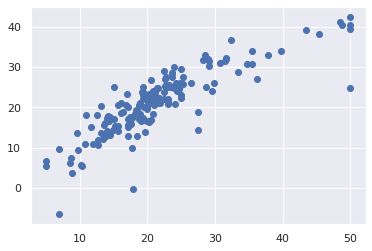

In [58]:
plt.scatter(y_test, predictions_test)

On peut faire un petit peu plus élégant en ajoutant un peu d'éléments à ce diagramme.

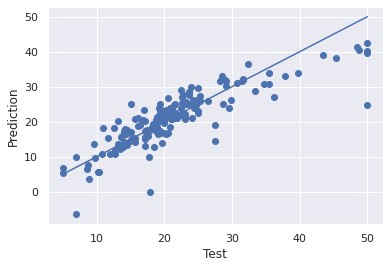

In [59]:
fig, ax = plt.subplots()  # Plusieurs figures en une
ax.scatter(y_test, predictions_test)  # les points sur la diagonales sont exactement prédits
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  # tracer la diagonale
ax.set_xlabel('Test')
ax.set_ylabel('Prediction')
plt.show()

Pour terminer, on peut répéter cette estimation de l'erreur en répétant plusieurs fois ce genre de calcul. 

**Action** Lire attentivement la [section sur l'évaluation](https://scikit-learn.org/stable/modules/cross_validation.html). Puis exécuter les celulles suivantes.

In [60]:
from sklearn.model_selection import cross_val_predict

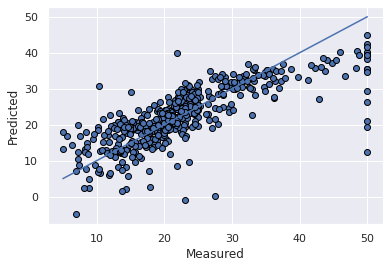

In [61]:
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()])
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()